In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from npgamma import calc_gamma

[-1.80000000e+00 -1.70000000e+00 -1.60000000e+00 -1.50000000e+00
 -1.40000000e+00 -1.30000000e+00 -1.20000000e+00 -1.10000000e+00
 -1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-01  1.55431223e-15  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
  6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01
  1.00000000e+00  1.10000000e+00  1.20000000e+00  1.30000000e+00
  1.40000000e+00  1.50000000e+00  1.60000000e+00  1.70000000e+00
  1.80000000e+00]
[-1.50000000e+00 -1.40000000e+00 -1.30000000e+00 -1.20000000e+00
 -1.10000000e+00 -1.00000000e+00 -9.00000000e-01 -8.00000000e-01
 -7.00000000e-01 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01
 -3.00000000e-01 -2.00000000e-01 -1.00000000e-01  1.33226763e-15
  1.00000000e-01  2.00000000e-01  3.00000000e-01  4.00000000e-01
  5.00000000e-01  6.00000000e-01  7.00000000e-01  8.00000000e-01
  9.000

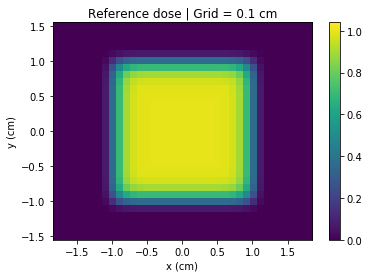

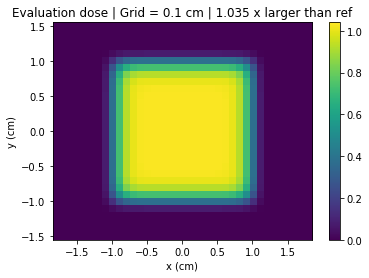

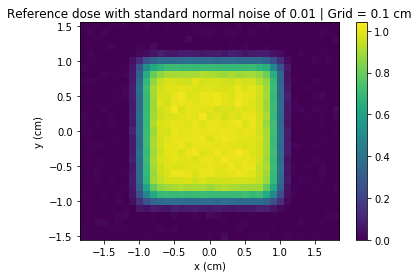

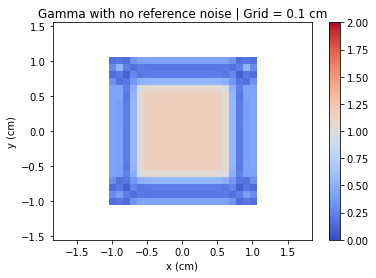

Passing rate with no reference noise = 0.63


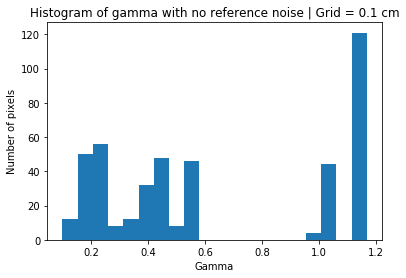

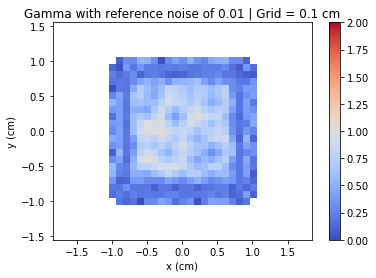

Passing rate with reference noise of 0.01 = 1.00


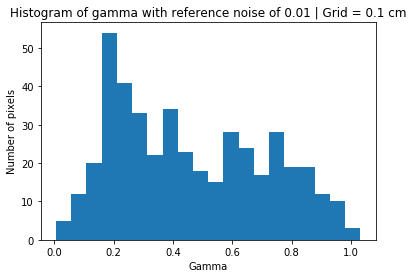

In [2]:
def plot_comparisons(grid, scale_factor, noise):
    x = np.arange(-1.8, 1.8 + 0.001, grid)
    print(x)
    y = np.arange(-1.5, 1.5 + 0.001, grid)
    print(y)
    coords = (y, x)

    xx, yy = np.meshgrid(x, y)

    dose_ref = np.exp(-(xx**10 + yy**10))

    plt.figure()
    plt.title('Reference dose | Grid = {} cm'.format(grid))
    plt.xlabel('x (cm)')
    plt.ylabel('y (cm)')

    plt.imshow(dose_ref, clim=(0, 1.04), extent=[-1.8-grid/2, 1.8+grid/2, -1.5-grid/2, 1.5+grid/2])
    plt.colorbar()

    # ===

    dose_eval = dose_ref * scale_factor

    plt.figure()
    plt.title('Evaluation dose | Grid = {} cm | {} x larger than ref'.format(grid, scale_factor))
    plt.xlabel('x (cm)')
    plt.ylabel('y (cm)')

    plt.imshow(dose_eval, clim=(0, 1.04), extent=[-1.8-grid/2, 1.8+grid/2, -1.5-grid/2, 1.5+grid/2])
    plt.colorbar()


    # ===

    dose_ref_noise = (np.random.normal(loc=0, scale=noise, size=np.shape(dose_ref)) + dose_ref)

    plt.figure()
    plt.title('Reference dose with standard normal noise of {} | Grid = {} cm'.format(noise, grid))
    plt.xlabel('x (cm)')
    plt.ylabel('y (cm)')

    plt.imshow(dose_ref_noise, clim=(0, 1.04), extent=[-1.8-grid/2, 1.8+grid/2, -1.5-grid/2, 1.5+grid/2])
    plt.colorbar()
    
    
    # ===
    
    gamma_no_noise = calc_gamma(coords, dose_ref, 
                                coords, dose_eval,
                                0.3, 0.03, lower_dose_cutoff=0.1, maximum_test_distance=0.6)

    plt.figure()
    plt.title('Gamma with no reference noise | Grid = {} cm'.format(grid))
    plt.xlabel('x (cm)')
    plt.ylabel('y (cm)')

    plt.imshow(gamma_no_noise, clim=(0, 2), extent=[-1.8-grid/2, 1.8+grid/2, -1.5-grid/2, 1.5+grid/2], cmap='coolwarm')
    plt.colorbar()
    
    plt.show()
    valid_gamma_no_noise = gamma_no_noise[~np.isnan(gamma_no_noise)]
    no_noise_passing = np.sum(valid_gamma_no_noise <= 1) / len(valid_gamma_no_noise)
    print("Passing rate with no reference noise = {0:.2f}".format(no_noise_passing))
    
    plt.figure()
    plt.title('Histogram of gamma with no reference noise | Grid = {} cm'.format(grid))
    plt.xlabel('Gamma')
    plt.ylabel('Number of pixels')
    
    plt.hist(valid_gamma_no_noise, 20)

    
    # ===
    
    gamma_with_noise = calc_gamma(coords, dose_ref_noise,
                                  coords, dose_eval,
                                  0.3, 0.03, lower_dose_cutoff=0.2, maximum_test_distance=0.6)

    plt.figure()
    plt.title('Gamma with reference noise of {} | Grid = {} cm'.format(noise, grid))
    plt.xlabel('x (cm)')
    plt.ylabel('y (cm)')

    plt.imshow(gamma_with_noise, clim=(0, 2), extent=[-1.8-grid/2, 1.8+grid/2, -1.5-grid/2, 1.5+grid/2], cmap='coolwarm')
    plt.colorbar()
    
    plt.show()
    valid_gamma_with_noise = gamma_with_noise[~np.isnan(gamma_with_noise)]
    with_noise_passing = np.sum(valid_gamma_with_noise <= 1) / len(valid_gamma_with_noise)
    print("Passing rate with reference noise of {0} = {1:.2f}".format(noise, with_noise_passing))

    plt.figure()
    plt.title('Histogram of gamma with reference noise of {} | Grid = {} cm'.format(noise, grid))
    plt.xlabel('Gamma')
    plt.ylabel('Number of pixels')
    valid_gamma_with_noise = gamma_with_noise[~np.isnan(gamma_with_noise)]
    plt.hist(valid_gamma_with_noise, 20)
    


grid = 0.1
scale_factor = 1.035
noise = 0.01

plot_comparisons(grid, scale_factor, noise)

[-1.8000000e+00 -1.6000000e+00 -1.4000000e+00 -1.2000000e+00
 -1.0000000e+00 -8.0000000e-01 -6.0000000e-01 -4.0000000e-01
 -2.0000000e-01 -4.4408921e-16  2.0000000e-01  4.0000000e-01
  6.0000000e-01  8.0000000e-01  1.0000000e+00  1.2000000e+00
  1.4000000e+00  1.6000000e+00  1.8000000e+00]
[-1.5 -1.3 -1.1 -0.9 -0.7 -0.5 -0.3 -0.1  0.1  0.3  0.5  0.7  0.9  1.1
  1.3  1.5]


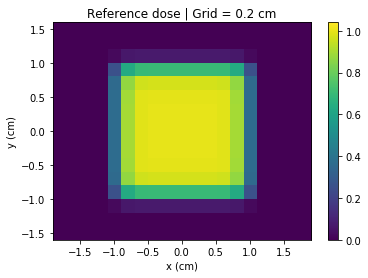

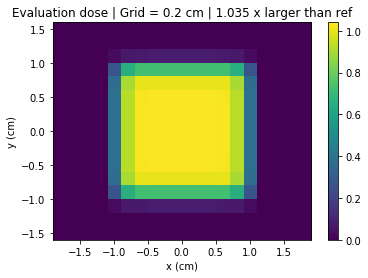

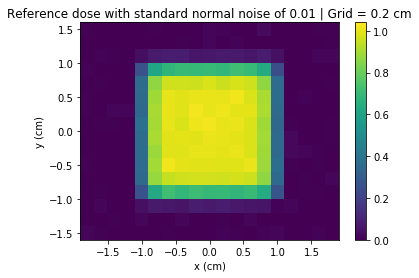

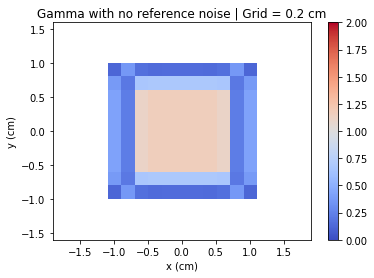

Passing rate with no reference noise = 0.62


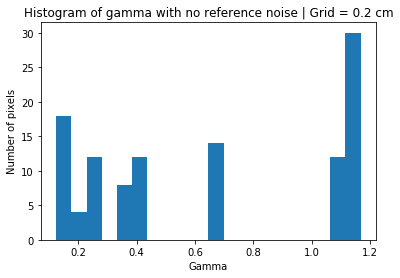

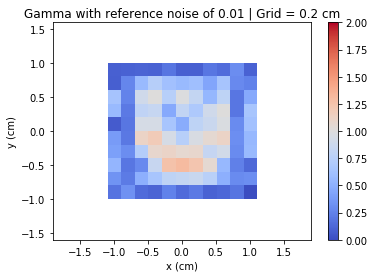

Passing rate with reference noise of 0.01 = 0.87


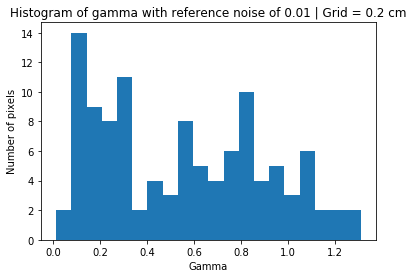

In [3]:
grid = 0.2
scale_factor = 1.035
noise = 0.01

plot_comparisons(grid, scale_factor, noise)